In [1]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sinkhorn Knopp Algorithm
## Matrix Balancing
Given $A$ a $m\times n$ non-negative matrix ($\forall i,j;  \; A_{ij}\geq 0$) find:

Diagonal square matrices $D_1$ ($m\times m$) and $D_2$ ($n\times n$)

So $P=D_1 A D_2$ is doubly stochastic (i.e., $\sum_{i}P_{i,.} = \sum_{j}P_{.,j} = 1$)
## Algorithm
We want to satisfy:

+ 1) $D_1AD_2\mathbf{1}_n = \mathbf{1}_n$
+ 2) $(D_1AD_2)^T\mathbf{1}_m = \mathbf{1}_m \quad \iff \quad D_2A^TD_1\mathbf{1}_m = \mathbf{1}_m$

Let $D_1 = Diag(r)$ and $D_2 = Diag(c)$

Then:
+ 1) $D_1AD_2\mathbf{1}_n = \mathbf{1}_n \quad \iff \quad  D_1Ac = \mathbf{1}_n \quad \iff \quad Ac = D_1^{-1}\mathbf{1}_n \quad \iff \quad Ac = r^{-1}$
+ 2) $D_2A^TD_1\mathbf{1}_m = \mathbf{1}_m \quad \iff \quad  D_2A^Tr = \mathbf{1}_m \quad \iff \quad A^Tr = D_2^{-1}\mathbf{1}_m \quad \iff \quad A^Tr = c^{-1}$

This can be solved __iteratively__:

+ $c_{k+1} \leftarrow \frac{1}{A^Tr_k}$
+ $r_{k+1} \leftarrow \frac{1}{Ac_{k+1}}$

In [295]:
def SinkhornKnopp(A, iterations):
    A = np.asarray(A)
    m,n = A.shape
    c = 1 / A.T.dot(np.ones(m))
    r = 1 / A.dot(np.ones(n))
    for i in range(iterations):
        D1 = np.diag(r)
        D2 = np.diag(c)
        #print(np.mean(D1.dot(A).dot(D2).dot(np.ones(n))))
        #print(np.mean(D2.dot(A.T).dot(D1).dot(np.ones(m))))
        c = 1 / A.T.dot(r)
        r = 1 / A.dot(c)
        
    P = D1.dot(A).dot(D2)
    return(P,D1,D2)

In [296]:
m = 10
n = 1000
A = np.random.randn(m,n)
A *= np.abs(np.random.randn(n))*2
A = (A.T*np.abs(np.random.randn(m))*3).T
A += np.abs(np.random.randn(n)*10)
A = (A.T + np.abs(np.random.randn(m))*10).T
#A = A/A.std(axis=0)
#A = (A.T/A.std(axis=1)).T

### Remove the intercept

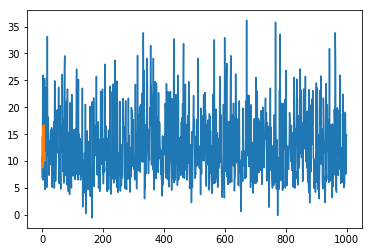

In [297]:
plt.plot(A.mean(axis=0))
plt.plot(A.mean(axis=1))

In [298]:
A-=A.mean(axis=0)
A = (A.T-A.mean(axis=1)).T

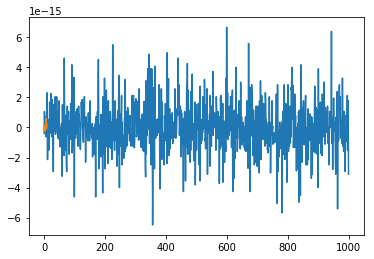

In [299]:
plt.plot(A.mean(axis=0))
plt.plot(A.mean(axis=1))

### Standardize

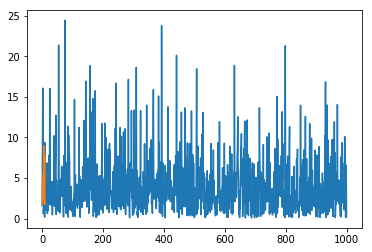

In [300]:
plt.plot(A.std(axis=0))
plt.plot(A.std(axis=1))

In [301]:
P,D1,D2 = SinkhornKnopp(A**2/n,100)

In [302]:
A_ = np.sqrt(D1).dot(A).dot(np.sqrt(D2))

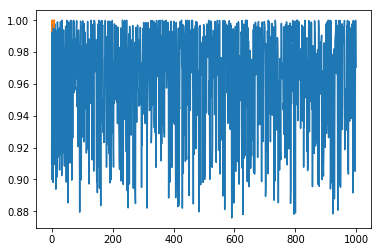

In [303]:
plt.plot(A_.std(axis=0))
plt.plot(A_.std(axis=1))

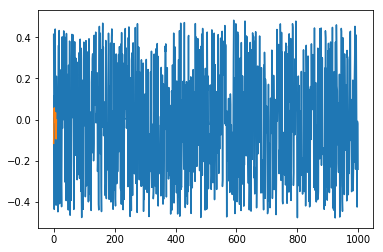

In [304]:
plt.plot(A_.mean(axis=0))
plt.plot(A_.mean(axis=1))

# RAS method
## Matrix balancing
Given $A$ a $m\times n$ non-negative matrix ($\forall i,j;  \; A_{ij}\geq 0$) find:

So $P=D_1 A D_2$ is s.t. $\sum_{i}P_{i,.} = r_i$ and  $\sum_{j}P_{.,j} = c_jk$

## Algorithm
__Repeat__:
    
+ $\forall i;\; A_{i,.} \leftarrow \frac{A_{i,.} \times r_i}{\sum_i A_{i,.}}$
+ $\forall j;\; A_{.,j} \leftarrow \frac{A_{.,j} \times c_j}{\sum_j A_{.,j}}$

In [286]:
def RAS(A,r,c,nb_iterations):
    for i in range(nb_iterations):
        A = (A.T*r/A.sum(axis=1)).T
        A = A*c/A.sum(axis=0)
    return(A)

In [287]:
m = 10
n = 1000
A = np.random.randn(m,n)
A *= np.abs(np.random.randn(n))*2
A = (A.T*np.abs(np.random.randn(m))*3).T
A += np.abs(np.random.randn(n)*10)
A = (A.T + np.abs(np.random.randn(m))*10).T

### Remove the intercept

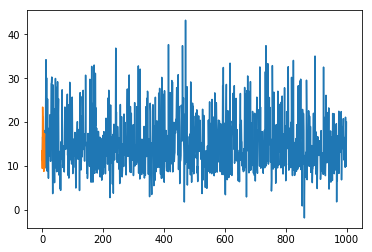

In [288]:
plt.plot(A.mean(axis=0))
plt.plot(A.mean(axis=1))

In [289]:
A-=A.mean(axis=0)
A = (A.T-A.mean(axis=1)).T

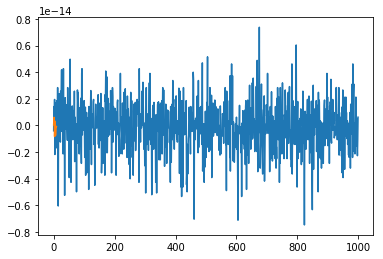

In [290]:
plt.plot(A.mean(axis=0))
plt.plot(A.mean(axis=1))

### Standardize

In [291]:
r = np.ones(m)*n
c = np.ones(n)*m
A_2 = RAS(A**2,r,c,10)

In [292]:
A_ = np.sqrt(A_2)*np.sign(A)

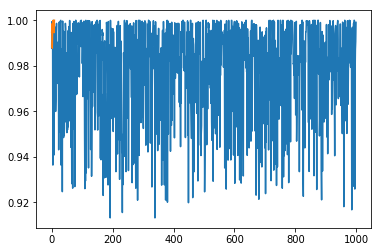

In [293]:
plt.plot(A_.std(axis=0))
plt.plot(A_.std(axis=1))

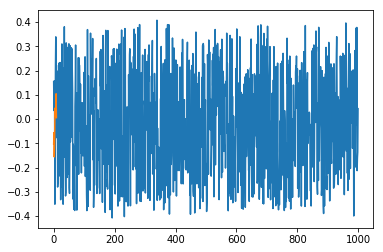

In [294]:
plt.plot(A_.mean(axis=0))
plt.plot(A_.mean(axis=1))

# Standardize alternatively rows and colums

In [321]:
def mean_std_polishing(A, nb_iterations):
    for i in range(nb_iterations):
        # mean polish the column
        A = A-A.mean(axis=0)
        # std polish the column
        A = A/A.std(axis=0)
        # mean polish the row
        A = (A.T-A.T.mean(axis=0)).T
        # std polish the row
        A = (A.T/A.T.std(axis=0)).T
    return(A)

In [322]:
m = 10
n = 1000
A = np.random.randn(m,n)
A *= np.abs(np.random.randn(n))*2
A = (A.T*np.abs(np.random.randn(m))*3).T
A += np.abs(np.random.randn(n)*10)
A = (A.T + np.abs(np.random.randn(m))*10).T

In [323]:
A_ = mean_std_polishing(A,100)

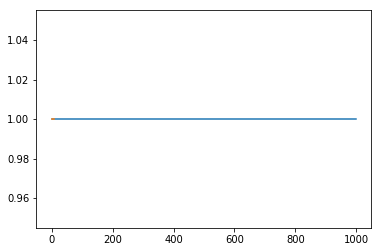

In [324]:
plt.plot(A_.std(axis=0))
plt.plot(A_.std(axis=1))

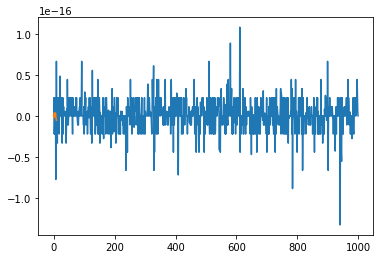

In [325]:
plt.plot(A_.mean(axis=0))
plt.plot(A_.mean(axis=1))

# Useful links
+ https://strathprints.strath.ac.uk/42589/1/fastbalance.pdf
+ https://github.com/btaba/sinkhorn_knopp/blob/master/sinkhorn_knopp/sinkhorn_knopp.py
+ https://cerfacs.fr/wp-content/uploads/2016/03/knight1.pdf
+ https://arxiv.org/pdf/1609.06349.pdf
+ http://www.numerical.rl.ac.uk/reports/drRAL2001034.pdf